<a href="https://colab.research.google.com/github/TharunSaiVT/INFO-5731/blob/main/V_T_Tharun_Sai_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [2]:
import re
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
# Write your code here
mypath = '/content/drive/My Drive/Colab Notebooks/output_with_lemmatized_abstract.csv'
df_new = pd.read_csv(mypath)

In [17]:
df_new.head(100)

,abstract,cleaned_abstract,abstract_without_stopwords,stemmed_abstract,lemmatized_abstract
0,"We present Fashion-MNIST, a new dataset compri...","we present fashion-mnist, a new dataset compri...","present Fashion-MNIST, new dataset comprising ...","we present fashion-mnist , a new dataset compr...","We present Fashion-MNIST , a new dataset compr..."
1,TensorFlow is a machine learning system that o...,tensorflow is a machine learning system that o...,TensorFlow machine learning system operates la...,tensorflow is a machin learn system that oper ...,TensorFlow is a machine learning system that o...
2,TensorFlow is an interface for expressing mach...,tensorflow is an interface for expressing mach...,TensorFlow interface expressing machine learni...,tensorflow is an interfac for express machin l...,TensorFlow is an interface for expressing mach...
3,The goal of precipitation nowcasting is to pre...,the goal of precipitation nowcasting is to pre...,goal precipitation nowcasting predict future r...,the goal of precipit nowcast is to predict the...,The goal of precipitation nowcasting is to pre...
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,"Spurred by advances in processing power, memor...","spurred by advances in processing power, memor...","Spurred advances processing power, memory, sto...","spur by advanc in process power , memori , sto...","Spurred by advance in processing power , memor..."
96,El sector salud tiene involucrado una gran can...,el sector salud tiene involucrado una gran can...,El sector salud tiene involucrado una gran can...,el sector salud tien involucrado una gran cant...,El sector salud tiene involucrado una gran can...
97,"Predictions obtained by, e.g., artificial neur...","predictions obtained by, e.g., artificial neur...","Predictions obtained by, e.g., artificial neur...","predict obtain by , e.g. , artifici neural net...","Predictions obtained by , e.g. , artificial ne..."
98,We study the resilience to Byzantine failures ...,we study the resilience to byzantine failures ...,study resilience Byzantine failures distribute...,we studi the resili to byzantin failur of dist...,We study the resilience to Byzantine failure o...


#**Data Cleaning**

In [7]:
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=26a0482530be2155e76aeb622bd68157a157836fb36f2ac5ff6e1eeecde1ae03
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [15]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer


tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

In [18]:
df_new['cleaned_abstract'] = df_new['cleaned_abstract'].fillna('')

In [19]:
df_new['Tokenization'] = df_new['cleaned_abstract'].apply(lambda x: tokenizer.tokenize(x))
df_new['Tokens'] = df_new['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
df_new['Stemming'] = df_new['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [20]:
texts = []
for line in df_new['Stemming']:
  texts.append(line)

#**Bigrams and Trigrams**

In [31]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['present', 'fashion_mnist', 'new', 'dataset', 'fashion', 'product', 'categori', 'imag', 'train', 'set', 'imag', 'test', 'set', 'fashion_mnist', 'intend', 'serv', 'direct', 'drop', 'share', 'size', 'datum', 'format', 'train', 'test', 'split', 'dataset', 'freeli_avail']


In [22]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [23]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [24]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [25]:
from spacy.cli.download import download
download(model="en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['present', 'fashion_mnist', 'new', 'dataset', 'fashion', 'product', 'categori', 'imag', 'train', 'set', 'imag', 'test', 'set', 'fashion_mnist', 'intend', 'serv', 'direct', 'drop', 'share', 'size', 'datum', 'format', 'train', 'test', 'split', 'dataset', 'freeli_avail']]


##**Preparing Corpus and Dictionary**

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

id2word[0]

In [29]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('categori', 1),
  ('dataset', 2),
  ('datum', 1),
  ('direct', 1),
  ('drop', 1),
  ('fashion', 1),
  ('fashion_mnist', 2),
  ('format', 1),
  ('freeli_avail', 1),
  ('imag', 2),
  ('intend', 1),
  ('new', 1),
  ('present', 1),
  ('product', 1),
  ('serv', 1),
  ('set', 2),
  ('share', 1),
  ('size', 1),
  ('split', 1),
  ('test', 2),
  ('train', 2)]]

#**LDA Model**

In [30]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [32]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.046*"research" + 0.017*"field" + 0.017*"technolog" + 0.016*"use" + '
  '0.016*"develop" + 0.015*"big" + 0.013*"paper" + 0.011*"process" + '
  '0.011*"term" + 0.010*"medic"'),
 (1,
  '0.085*"extract" + 0.084*"inform" + 0.040*"system" + 0.027*"text" + '
  '0.025*"base" + 0.022*"use" + 0.021*"approach" + 0.016*"document" + '
  '0.014*"process" + 0.013*"pattern"'),
 (2,
  '0.084*"model" + 0.034*"method" + 0.030*"use" + 0.026*"train" + '
  '0.017*"result" + 0.016*"perform" + 0.016*"set" + 0.016*"show" + '
  '0.013*"effect" + 0.012*"test"'),
 (3,
  '0.045*"open" + 0.035*"user" + 0.024*"sourc" + 0.024*"larg" + 0.021*"set" + '
  '0.019*"step" + 0.014*"datum" + 0.014*"support" + 0.013*"game" + '
  '0.012*"clinic"'),
 (4,
  '0.074*"learn" + 0.026*"machin" + 0.021*"use" + 0.019*"comput" + '
  '0.018*"problem" + 0.014*"recent" + 0.012*"network" + 0.012*"approach" + '
  '0.011*"imag" + 0.011*"develop"'),
 (5,
  '0.040*"chapter" + 0.033*"student" + 0.032*"program" + 0.026*"group" + '
  '0.

In [33]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.064601131073182

Coherence Score:  0.40295610119857167


#**LSA Model**

In [37]:
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

In [38]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '0.497*"datum" + 0.405*"learn" + 0.253*"use" + 0.212*"model" + '
  '0.200*"scienc" + 0.180*"inform" + 0.157*"system" + 0.153*"machin" + '
  '0.149*"extract" + 0.135*"research"'),
 (1,
  '0.609*"datum" + -0.514*"learn" + 0.362*"scienc" + -0.196*"machin" + '
  '-0.163*"model" + 0.160*"big" + -0.153*"extract" + -0.121*"system" + '
  '-0.095*"inform" + 0.087*"research"'),
 (2,
  '-0.533*"extract" + -0.498*"inform" + 0.485*"learn" + 0.192*"machin" + '
  '-0.177*"system" + 0.140*"datum" + -0.133*"text" + -0.112*"use" + '
  '-0.087*"base" + -0.081*"document"'),
 (3,
  '0.755*"model" + -0.237*"learn" + -0.234*"research" + -0.186*"scienc" + '
  '0.180*"predict" + -0.126*"ai" + 0.125*"datum" + -0.123*"system" + '
  '0.107*"exampl" + 0.104*"train"'),
 (4,
  '0.445*"ai" + 0.423*"system" + -0.277*"extract" + -0.274*"learn" + '
  '-0.261*"datum" + 0.250*"research" + -0.212*"inform" + 0.149*"model" + '
  '0.142*"develop" + 0.137*"intellig"'),
 (5,
  '-0.622*"scienc" + 0.373*"datum" + 0.371*"sy

LSA Model with 2 topics:
[(0,
  '0.497*"datum" + 0.405*"learn" + 0.253*"use" + 0.212*"model" + '
  '0.200*"scienc" + 0.180*"inform" + 0.157*"system" + 0.153*"machin" + '
  '0.149*"extract" + 0.135*"research"'),
 (1,
  '0.609*"datum" + -0.514*"learn" + 0.362*"scienc" + -0.196*"machin" + '
  '-0.163*"model" + 0.160*"big" + -0.153*"extract" + -0.121*"system" + '
  '-0.095*"inform" + 0.087*"research"')]
Coherence Value for 2 topics: 0.40506832584338537
LSA Model with 3 topics:
[(0,
  '0.497*"datum" + 0.405*"learn" + 0.253*"use" + 0.212*"model" + '
  '0.200*"scienc" + 0.180*"inform" + 0.157*"system" + 0.153*"machin" + '
  '0.149*"extract" + 0.135*"research"'),
 (1,
  '0.609*"datum" + -0.514*"learn" + 0.362*"scienc" + -0.196*"machin" + '
  '-0.163*"model" + 0.160*"big" + -0.153*"extract" + -0.121*"system" + '
  '-0.095*"inform" + 0.087*"research"'),
 (2,
  '-0.533*"extract" + -0.498*"inform" + 0.485*"learn" + 0.192*"machin" + '
  '-0.176*"system" + 0.139*"datum" + -0.133*"text" + -0.112*"use

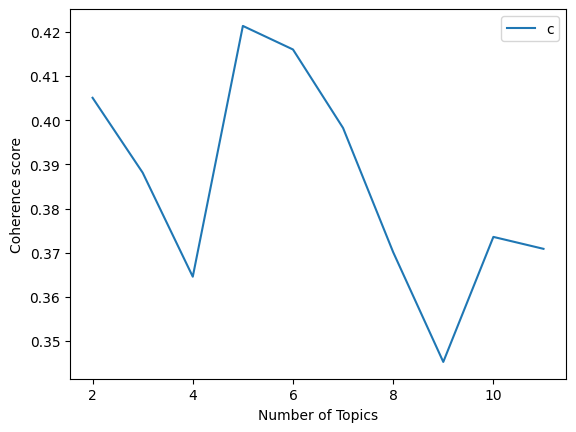

In [43]:
from gensim.models import CoherenceModel, LsiModel
import numpy as np
import matplotlib.pyplot as plt


model_list = []
coherence_values = []
for num_topics in range(2, 12):
    model = LsiModel(corpus, num_topics=num_topics, id2word=id2word)
    model_list.append(model)

    print(f"LSA Model with {num_topics} topics:")
    pprint(model.print_topics())

    coherencemodel = CoherenceModel(model=model, texts=df_new['Stemming'], dictionary=id2word, coherence='c_v')
    coherence = coherencemodel.get_coherence()

    print(f"Coherence Value for {num_topics} topics: {coherence}")

    coherence_values.append(coherence)


clean_coherence_values = [value if not np.isnan(value) else 0 for value in coherence_values]  # Replace nan with 0

plt.plot(range(2, 12), clean_coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#**Summarization of LDA Topics**

In [ ]:


1. Cluster 1: Data Science and Machine Learning Applications
   - Keywords: data, learn, use, model, science, information, system, machine, extract, research
   - Description: This cluster appears to focus on the application of machine learning and data science, including the use of models to extract information from datasets for research purposes.

2. Cluster 2: Big Data and Scientific Research
   - Keywords: data, learn, science, machine, model, big, extract, system, information, research
   - Description: This cluster emphasizes the role of big data in scientific research, likely discussing the utilization of machine learning models for extracting information from large datasets in various scientific domains.

3. Cluster 3: Information Extraction and Text Processing
   - Keywords: extract, information, learn, machine, system, data, text, use, base, document
   - Description: This cluster seems to focus on techniques for extracting information from textual data, potentially discussing methods and systems used in natural language processing tasks.

4. Cluster 4: Modeling and Prediction
   - Keywords: model, learn, research, science, predict, AI, data, system, example, train
   - Description: This cluster highlights the use of models, likely machine learning models, for prediction tasks in research and scientific contexts, possibly discussing examples and training methodologies.

5. Cluster 5: Artificial Intelligence and Research Development
   - Keywords: AI, system, extract, learn, data, research, information, model, develop, intelligence
   - Description: This cluster likely focuses on the intersection of artificial intelligence (AI) with research and development, discussing systems, data extraction, and model development for intelligent applications.

6. Cluster 6: Data Systems and Methodologies
   - Keywords: use, system, science, method, model, research, learn, extract, information, chapter
   - Description: This cluster seems to discuss the use of systems and methodologies in scientific research, including the application of models and data extraction techniques within different chapters or sections.

7. Cluster 7: AI in Health Research
   - Keywords: research, system, AI, information, science, use, model, problem, chapter, health
   - Description: This cluster appears to focus specifically on the application of AI in health research, discussing systems, models, and information processing techniques for addressing health-related problems.

8. Cluster 8: Research Methods and Scientific Information
   - Keywords: research, AI, fact, system, word, science, method, information, chapter, gene
   - Description: This cluster discusses research methods and the dissemination of scientific information, including the role of AI, facts, words, and genetic research within different chapters or sections.

9. Cluster 9: Probabilistic Modeling and Genetic Research
   - Keywords: use, fact, research, word, gene, science, base, chapter, AI, probability
   - Description: This cluster seems to discuss probabilistic modeling and genetic research, including the use of facts, words, and genetic data within different chapters or sections.



#**Summarization of LSA Topics**

In [ ]:

1. LSA Model with 2 topics

   - Topic 1: Focused on data and learning, emphasizing terms like "datum", "learn", "model", "science", "information", and "system".

2. LSA Model with 3 topics:

   - Topic 2: Similar to the second topic of the 2-topic model, centering on data science and research.

3. LSA Model with 4 topics:

   - Topic 4: Introduces a new theme centered around modeling and prediction, with terms like "model", "predict", "AI", and "train".

4. LSA Model with 5 topics:

   - Topic 5: AI systems and development.

5. LSA Model with 6 topics:

   - Topic 6: Focuses on scientific fields and research, mentioning "science", "research", "model", and "big".

6. LSA Model with 7 topics:

   - Topic 7: Discusses the usage of systems and methods in science and research, mentioning "use", "system", "science", and "method".

7. LSA Model with 8 topics:

   - Topic 8: Emphasizes the relationship between research, systems, AI, and information, mentioning terms like "research", "system", "AI", and "information".

8. LSA Model with 9 topics:

   - Topic 9: Discusses research methods, information, and genetics, mentioning terms like "research", "fact", "word", and "gene".

9. LSA Model with 10 topics:

   - Topic 10: Discusses the usage of terms related to research, information, and genetics.

10. LSA Model with 11 topics:

    - Topic 11: Focuses on information extraction, AI, methods, and prediction.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

# **For feature selection in sentiment classification, I used TF-IDF**

In [ ]:
I used the TF-IDF (Term Frequency-Inverse Document Frequency) vectors of the
lemmatized abstracts for feature selection in sentiment classification.
TF-IDF downweights common terms while capturing the distinctive qualities of each abstract
by reflecting a term's relevance within a document in relation to a collection of documents.
This method reduces noise from commonly occurring words like "the," "and," etc.,
which might not convey important sentiment information, while still helping to capture the
substance of the text.

Because TF-IDF vectors take into account both the presence of words and their significance
in differentiating between positive, negative, and neutral attitudes, they are useful in sentiment
analysis tasks. We also preserve the text's semantic meaning, which is important for sentiment
analysis, by employing TF-IDF vectors.

# **As for the choice of supervised learning algorithms, I used Multinomial Naive Bayes and Logistic Regression and also compared the performance for the two algorithms**

In [56]:
# Import statements
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
nltk.download('stopwords')

# Read data
mypath4 = '/content/drive/My Drive/Colab Notebooks/sentiment_analysis_results.csv'
Q2_df = pd.read_csv(mypath4)

# Drop missing values and convert lemmatized_abstract to string
Q2_df.dropna(inplace=True)
Q2_df['lemmatized_abstract'] = Q2_df['lemmatized_abstract'].astype(str)

# Split data into features and target
X = Q2_df['lemmatized_abstract']
y = Q2_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Model 1: Multinomial Naive Bayes
nb_pipeline = make_pipeline(vectorizer, MultinomialNB())
nb_cv_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=10, scoring='accuracy')

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

# Evaluation Metrics for Naive Bayes
print("Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes - Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Naive Bayes - Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("Naive Bayes - F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))

# Model 2: Logistic Regression
lr_pipeline = make_pipeline(vectorizer, LogisticRegression(random_state=42))
lr_cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=10, scoring='accuracy')

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluation Metrics for Logistic Regression
print()
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression - Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression - F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naive Bayes - Accuracy: 0.8607681755829903
Naive Bayes - Precision: 0.8538358772655786
Naive Bayes - Recall: 0.8607681755829903
Naive Bayes - F1 Score: 0.8032144180809813

Logistic Regression - Accuracy: 0.9238683127572016
Logistic Regression - Precision: 0.9300865741876289
Logistic Regression - Recall: 0.9238683127572016
Logistic Regression - F1 Score: 0.9110338721861088


**By this we can say that Logistic regression performed well rather than Naive Bayes.**

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [61]:
# Write your code here
mypath1 = '/content/drive/My Drive/Colab Notebooks/test.csv'
mypath2 = '/content/drive/My Drive/Colab Notebooks/train.csv'
train_dataset = pd.read_csv(mypath2)
test_dataset = pd.read_csv(mypath1)

In [62]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [63]:
# Check for missing values
print(train_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# **EDA**

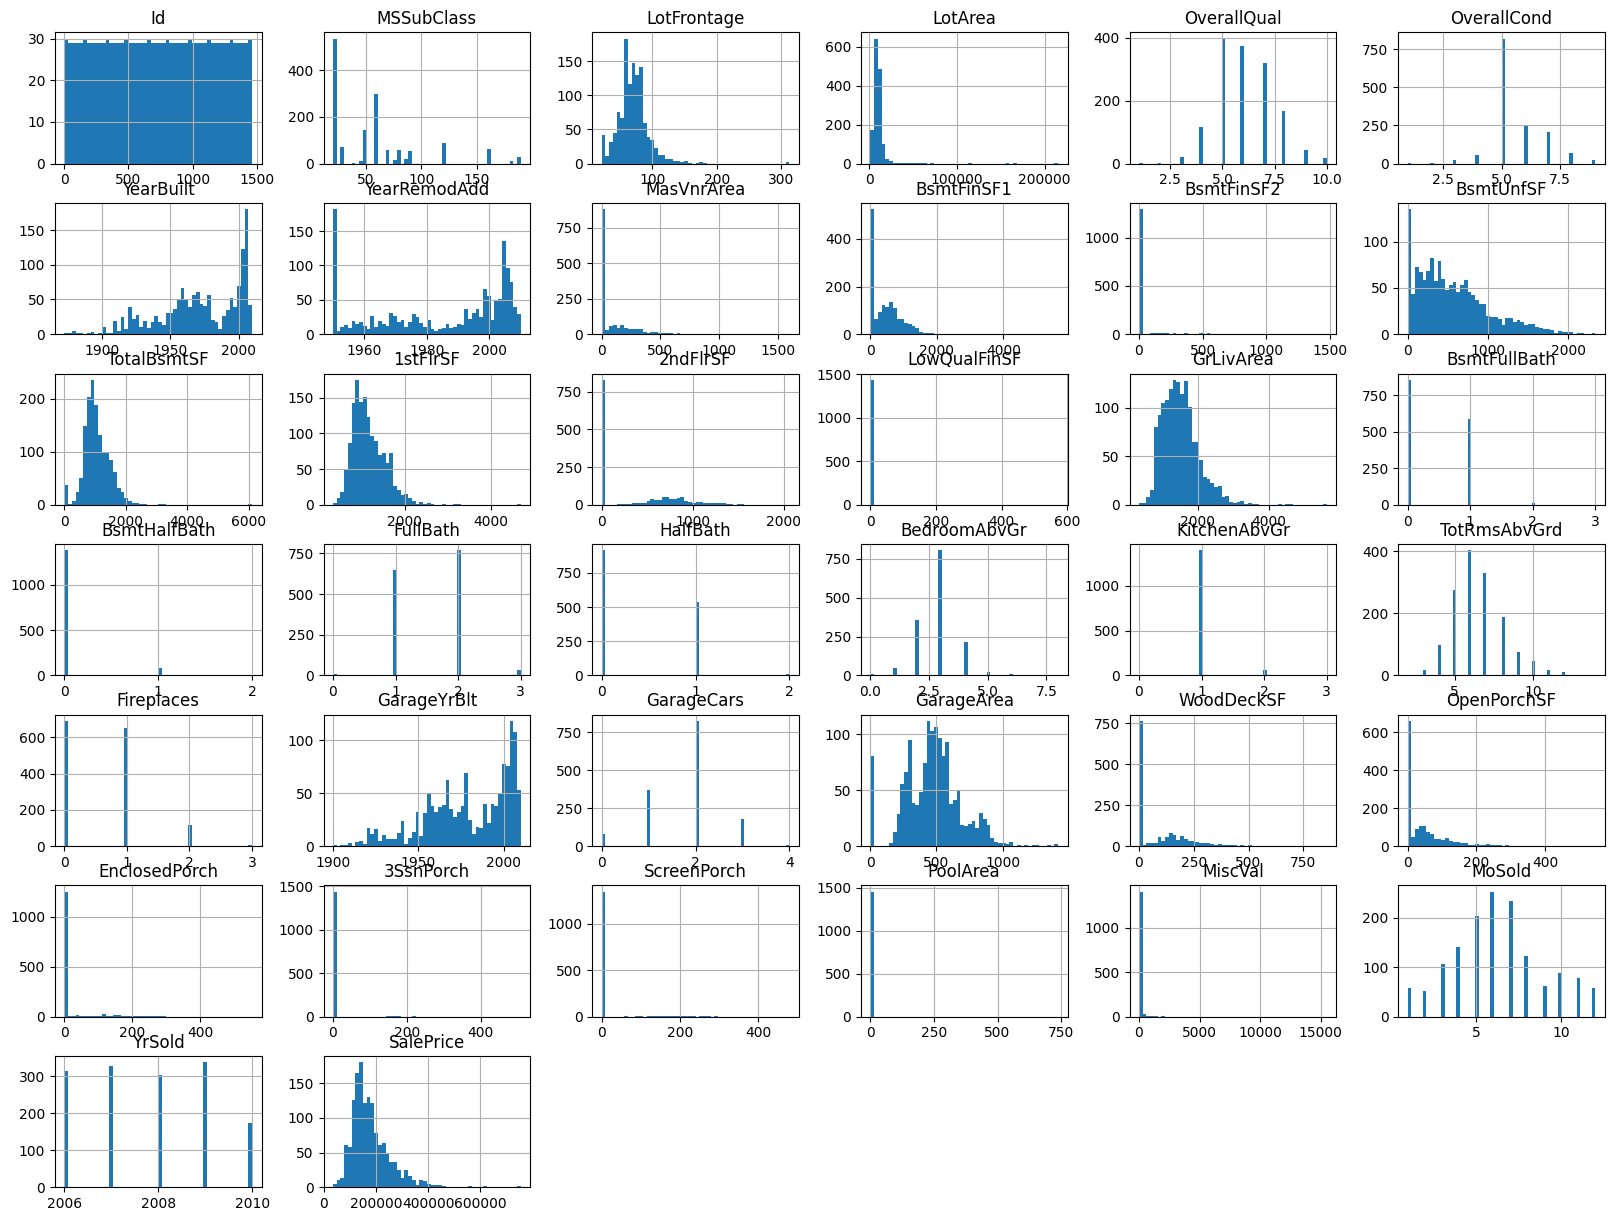

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [66]:
numeric_cols = train_dataset.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

sorted_correlations = corr_matrix["SalePrice"].sort_values(ascending=False)

print(sorted_correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

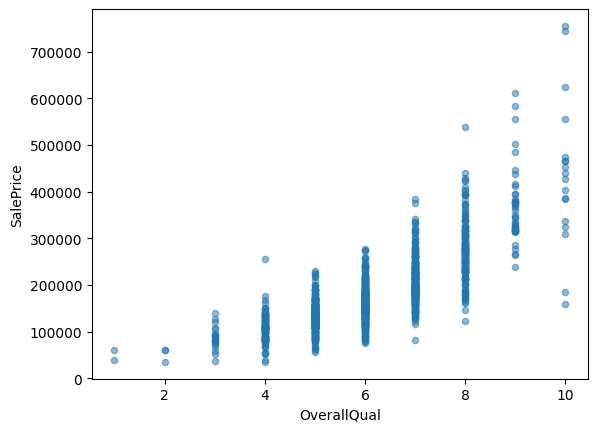

In [67]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

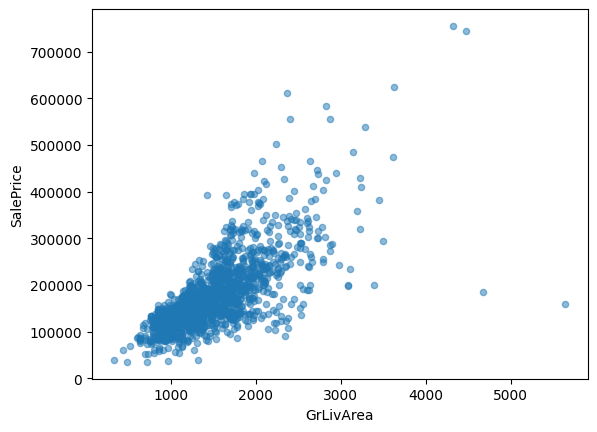

In [68]:
train_dataset.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

In [69]:
print(train_dataset.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [70]:
train_dataset = train_dataset.apply(pd.to_numeric, errors='coerce')
test_dataset = test_dataset.apply(pd.to_numeric, errors='coerce')

In [71]:
train_dataset.fillna(train_dataset.mean(), inplace=True)
test_dataset.fillna(test_dataset.mean(), inplace=True)

In [72]:
print(train_dataset.isnull().sum())
print(test_dataset.isnull().sum())

Id                  0
MSSubClass          0
MSZoning         1460
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType         1460
SaleCondition    1460
SalePrice           0
Length: 81, dtype: int64
Id                  0
MSSubClass          0
MSZoning         1459
LotFrontage         0
LotArea             0
                 ... 
MiscVal             0
MoSold              0
YrSold              0
SaleType         1459
SaleCondition    1459
Length: 80, dtype: int64


In [73]:
train_dataset.fillna(train_dataset.mean(), inplace = True)
test_dataset.fillna(test_dataset.mean(), inplace = True)

In [74]:
print(train_dataset.isnull().sum())

Id                  0
MSSubClass          0
MSZoning         1460
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType         1460
SaleCondition    1460
SalePrice           0
Length: 81, dtype: int64


In [75]:
print(test_dataset.isnull().sum())

Id                  0
MSSubClass          0
MSZoning         1459
LotFrontage         0
LotArea             0
                 ... 
MiscVal             0
MoSold              0
YrSold              0
SaleType         1459
SaleCondition    1459
Length: 80, dtype: int64


All the features which i have selected are internally correlated to each other, i feel every feature is important according to their usage. Thats why i selected all of them.

# **Data Encoding**

In [76]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_dataset[column].values))
    train_dataset[column] = encoder.transform(list(train_dataset[column].values))

In [77]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_dataset[column].values))
    test_dataset[column] = encoder_test.transform(list(test_dataset[column].values))

In [78]:
x_values = train_dataset[train_dataset.columns[:80]]

In [79]:
x_test_values = test_dataset[test_dataset.columns[:80]]

In [80]:
y_values = train_dataset['SalePrice']

In [81]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

0.8135133793821677

# **Predicting the House Sale Price**

In [82]:
predicted = reg_model.predict(x_test_values)

In [83]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,116554.069775
1,151362.702797
2,170786.346810
3,197939.017805
4,192306.078574
...,...
1454,57292.367917
1455,64527.075453
1456,170735.232571
1457,94878.025551


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


# **Description of DistilBERT Model**

In [ ]:
The DistilBERT pre-trained language model (PLM)—more precisely, the "typeform/distilbert-base-uncased-mnli"
 model—was chosen for this assignment. Hugging Face created the original BERT (Bidirectional Encoder
Representations from Transformers) model, which is faster and smaller than DistilBERT.

Parameter Count: DistilBERT's "base" version includes 66 million parameters. Nevertheless, additional training on the MNLI (MultiNLI) dataset for natural language inference has added a few extra parameters to the particular variation employed here (distilbert-base-uncased-mnli).
Task-Particular Fine Tuning: The MNLI dataset, which features phrase pairs labelled for entailment, contradiction, and neutral links, has been used to fine-tune the model. This optimisation improves the model's comprehension of textual entailment tasks.

# **Evaluating the Performance of the Model**

In [ ]:
# Write your code here

mypath5 = '/content/drive/My Drive/Colab Notebooks/sentiment_analysis_results.csv'

Senti_df = pd.read_csv(mypath5)

Senti_df

In [85]:
import pandas as pd
from transformers import pipeline

# Load the zero-shot classification pipeline with DistilBERT
classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli")

# Sample abstracts from scientific papers
abstracts = Senti_df['lemmatized_abstract']

import pandas as pd

# Assuming 'df' is your DataFrame and 'abstracts' is the column of interest
Senti_df['lemmatized_abstract'].dropna(inplace=True)  # Remove any rows with NaN values
Senti_df['lemmatized_abstract'] = Senti_df['lemmatized_abstract'].astype(str)  # Convert all entries to strings

Senti_df = Senti_df.dropna(subset=['lemmatized_abstract'])  # Drop any rows where 'abstracts' might be NaN

Senti_df

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


,index,lemmatized_abstract,sentiment
0,abstract 1,"We present Fashion-MNIST , a new dataset compr...",Positive
1,abstract 2,TensorFlow is a machine learning system that o...,Positive
2,abstract 3,TensorFlow is an interface for expressing mach...,Positive
3,abstract 4,The goal of precipitation nowcasting is to pre...,Negative
4,abstract 5,Machine learning address the question of how t...,Positive
...,...,...,...
7281,abstract 7282,The image displayed in computed tomography is ...,Positive
7282,abstract 7283,Automatically acquiring synonymous collocation...,Negative
7283,abstract 7284,The past decade ha seen an explosion in the am...,Positive
7284,abstract 7285,We have recently completed the sixth in a seri...,Positive


In [91]:
new_Senti_df = Senti_df.head(25)
new_Senti_df

,index,lemmatized_abstract,sentiment
0,abstract 1,"We present Fashion-MNIST , a new dataset compr...",Positive
1,abstract 2,TensorFlow is a machine learning system that o...,Positive
2,abstract 3,TensorFlow is an interface for expressing mach...,Positive
3,abstract 4,The goal of precipitation nowcasting is to pre...,Negative
4,abstract 5,Machine learning address the question of how t...,Positive
5,abstract 6,With the widespread use of artificial intellig...,Positive
6,abstract 7,All right reserved . No part of this book may ...,Negative
7,abstract 8,Scikit-learn is a Python module integrating a ...,Positive
8,abstract 9,Gaussian process ( GPs ) are natural generalis...,Positive
9,abstract 10,From the Publisher : Classifier system play a ...,Positive


In [92]:
# Adapted sentiment labels for scientific context
labels = new_Senti_df['sentiment']

def classify_batch(abstracts, batch_size=10):
    results = []
    for i in range(0, len(abstracts), batch_size):
        batch = abstracts[i:i+batch_size]
        if len(batch) == 0:
            continue  # Skip empty batches
        batch_results = classifier(batch, candidate_labels=labels, hypothesis_template="The findings of this study are {}.")
        results.extend([result['labels'][0] for result in batch_results])
    return results

# Assuming you have a function to process batch predictions
results = classify_batch(new_Senti_df['lemmatized_abstract'].tolist())

# Apply the function to the 'abstracts' column and create a new 'sentiment' column
new_Senti_df['Pred_sentiment'] = classify_batch(new_Senti_df['lemmatized_abstract'].tolist())

# Print the updated DataFrame
new_Senti_df

<ipython-input-92-9cf828c203a5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Senti_df['Pred_sentiment'] = classify_batch(new_Senti_df['lemmatized_abstract'].tolist())


,index,lemmatized_abstract,sentiment,Pred_sentiment
0,abstract 1,"We present Fashion-MNIST , a new dataset compr...",Positive,Negative
1,abstract 2,TensorFlow is a machine learning system that o...,Positive,Positive
2,abstract 3,TensorFlow is an interface for expressing mach...,Positive,Positive
3,abstract 4,The goal of precipitation nowcasting is to pre...,Negative,Positive
4,abstract 5,Machine learning address the question of how t...,Positive,Positive
5,abstract 6,With the widespread use of artificial intellig...,Positive,Positive
6,abstract 7,All right reserved . No part of this book may ...,Negative,Negative
7,abstract 8,Scikit-learn is a Python module integrating a ...,Positive,Positive
8,abstract 9,Gaussian process ( GPs ) are natural generalis...,Positive,Negative
9,abstract 10,From the Publisher : Classifier system play a ...,Positive,Positive


In [93]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

predictions = new_Senti_df['Pred_sentiment']
true_labels = new_Senti_df['sentiment']

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predictions)

# Calculate Precision, Recall, and F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.56
Precision: 0.5933333333333333
Recall: 0.56
F1 Score: 0.5681038961038961


# **Advantges and Disadvantages of DstilBERT and also written the Challenges faced.**

In [ ]:
In this case, there are various benefits to zero-shot classification using the DistilBERT model.
It does this by first utilising transfer learning, which pre-trains it on a large volume of textual data, enabling it to recognise intricate linguistic nuances and patterns.
This is especially helpful for activities where context knowledge is essential, like sentiment analysis. Second, the DistilBERT model is more practical for large-scale or real-time applications
due to its computing efficiency when compared to its larger counterparts, such as BERT.
Additionally, as the model may make predictions without explicitly being trained on particular classes, the zero-shot classification capability offers flexibility in data labelling.

But there are also certain restrictions and difficulties to take into account.
Making sure the model performs in a way that is appropriate for the task at hand is one challenge.
Even if pre-trained models like DistilBERT are strong, without task-specific data fine-tuning,
they could not always generalise well to certain domains or tasks. As such, performance can change
based on the type of abstracts being examined. To optimise the efficacy of the model,
meticulous preprocessing of the text data is also a factor to take into account.
This covers things like text normalisation, addressing missing data, and possibly
handling language or jargon unique to a certain field.
